In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading in the data
columns = ['Cement',
           'Slag',
           'Fly ash',
           'Water',
           'SP',
           'Coarse Aggr',
           'Fine Aggr',
           'output']

train_data = pd.read_csv('concrete/train.csv', names=columns, header=None)
test_data = pd.read_csv('concrete/test.csv', names=columns, header=None)


# Batch gradient 4a

In [16]:
def batch_gradient_descent(data, result_variable, learning_rate=1.0, tolerance=1e-6):

    # Extract features and target variable for training
    X_train = data.drop(result_variable, axis=1).values
    y_train = train_data[result_variable].values

    # Initialize weight vector with zeros
    weights = np.zeros(X_train.shape[1])

    # variables to store cost function values and number of steps/iterations the program goes through
    costs = []
    steps = 0

    while True:
        steps += 1
        prev_weights = weights.copy()

        #predictions
        y_pred = np.dot(X_train, weights)

        #error
        error = y_pred - y_train

        #gradients
        gradients = np.dot(X_train.T, error) / len(X_train)

        # Update weights
        new_weights = weights - learning_rate * gradients
        weights = new_weights

        # Calculate the cost on training data
        cost_train = np.mean((y_pred - y_train) ** 2)
        costs.append(cost_train)

        # Check for convergence based on the norm of weight difference
        if np.linalg.norm(new_weights - prev_weights) < tolerance:
            # Plot cost vs. number of steps
            plt.plot(range(steps), costs, marker='o')
            plt.xlabel('Number of Steps')
            plt.ylabel('Cost (Training Data)')
            plt.title('Cost vs. Number of Steps')
            plt.grid(True)
            plt.show()
            return weights, steps, learning_rate

        # Decrease the learning rate
        #print("Learning Rate: ", learning_rate)
        learning_rate *= 0.5




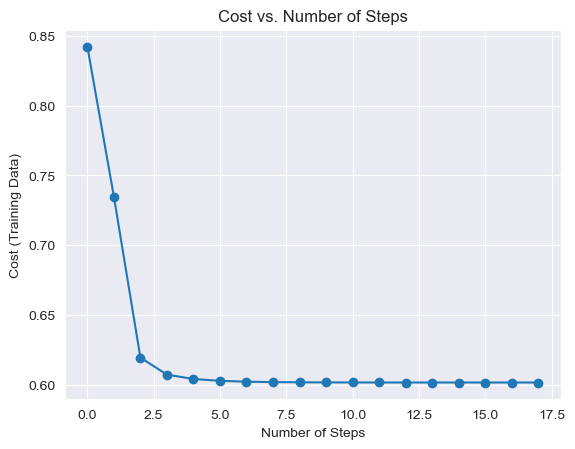

Learned Weights: [-0.0078226  -0.19959296 -0.15863473  0.37577773 -0.02918666  0.11809481
 -0.03346571]
Number of Steps:  18
Learning Rate:  7.62939453125e-06


In [28]:
#calling batch gradient descent by giving the data and the result column name
learned_weights, num_steps, learning_rate = batch_gradient_descent(train_data, 'output')
print('Learned Weights:', learned_weights)
print('Number of Steps: ', num_steps)
print("Learning Rate: ", learning_rate)

In [29]:
Test_data = test_data.drop('output', axis=1).values
final_weights = learned_weights 

# Calculate predictions on the test data
y_pred_test = np.dot(Test_data, final_weights)

Test_data_output = test_data['output'].values

# Calculate the mean squared error (MSE) as the cost on the test data
test_cost = np.mean((y_pred_test - Test_data_output) ** 2)

print('Cost Test Data:', test_cost)


Cost Test Data: 0.8674695544986697


## Stochastic gradient descent 4b

In [5]:
columns = ['Cement',
           'Slag',
           'Fly ash',
           'Water',
           'SP',
           'Coarse Aggr',
           'Fine Aggr',
           'output']

train_data = pd.read_csv('concrete/train.csv', names=columns, header=None)
test_data = pd.read_csv('concrete/test.csv', names=columns, header=None)

In [19]:

def stochastic_gradient_descent(data, result_variable, initial_learning_rate=0.1, tolerance=1e-6):

    # Extract features and target variable for training
    X_train = data.drop(result_variable, axis=1).values
    y_train = data[result_variable].values


    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Store learning rates, cost function values, and the number of updates
    learning_rates = []
    costs = []
    num_updates = 0

    while True:
        # Shuffle the training data for each interation until convergence
        idx = np.random.permutation(len(X_train))
        X_train_shuffled_random = X_train[idx]
        y_train_shuffled_random = y_train[idx]

        for i in range(len(X_train)):
            
            # Sample a random training example
            xi = X_train_shuffled_random[i]
            yi = y_train_shuffled_random[i]

            #prediction and error
            y_pred = np.dot(xi, weights)
            error = y_pred - yi

            #gradient for this example
            gradient = xi * error

            # Update weights
            new_weights = weights - initial_learning_rate * gradient
            weights = new_weights

            # Calculate the cost
            predictions = np.dot(X_train, weights)
            errors = predictions - y_train
            cost_train = np.mean(errors**2) / 2
            costs.append(cost_train)
            learning_rates.append(initial_learning_rate)
            num_updates += 1

            # Check for convergence
            if len(costs) > 1 and np.abs(costs[-1] - costs[-2]) < tolerance:
                # Plot cost vs. number of updates
                plt.plot(range(num_updates), costs, marker='o')
                plt.xlabel('Number of Updates')
                #cost on training data
                plt.ylabel('Cost')
                plt.title('Cost vs. Number of Updates')
                plt.grid(True)
                plt.show()
                return weights, initial_learning_rate, num_updates

            # Decrease the learning rate
            #print('learning Rate: ', initial_learning_rate)
            initial_learning_rate *= 0.5


    return weights, initial_learning_rate

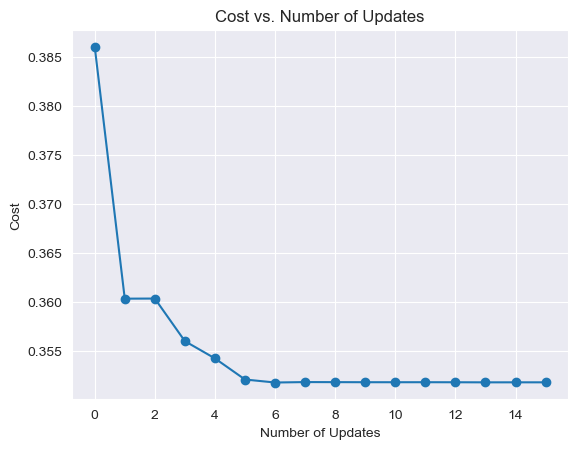

Learned Weights: [ 0.1794545  -0.2471264  -0.13259447  0.21027172  0.04001232  0.00053246
  0.04343056]
Learning Rate:  3.0517578125e-06
Number of Updates 16


In [45]:
# calling the function
learned_weights, learning_rate, num_updates = stochastic_gradient_descent(train_data, 'output')
print('Learned Weights:', learned_weights)
print('Learning Rate: ', learning_rate)
print('Number of Updates', num_updates)

In [46]:
Test_data = test_data.drop('output', axis=1).values
final_weights = learned_weights

# Calculate predictions on the test data
y_pred_test = np.dot(Test_data, final_weights)

Test_data_output = test_data['output'].values

# Calculate the mean squared error (MSE) as the cost on the test data
test_cost = np.mean((y_pred_test - Test_data_output) ** 2)

print('Cost on Test Data:', test_cost)

Cost on Test Data: 0.8935920116136927


# 4c

In [47]:
X_train = train_data.drop('output', axis=1).values
y_train = train_data['output'].values

w_optimal = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)


print('Optimal Weight Vector:', w_optimal)

Optimal Weight Vector: [0.92154947 0.80829428 0.87397433 1.3142877  0.13392374 1.59904727
 1.02029192]
